In [68]:
%matplotlib ipympl
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from typing import Iterable
from simulate_dicke import sim_dicke


In [2]:
def plot_sim_dicke(
    N: int, T: float, n: int = 0, freq: float = 1.0, coup: float = 1.0
):
    tt, vt, et = sim_dicke(N, T, n, freq, coup)
    plt.scatter(tt, np.real_if_close(et[0]), s=10)
    plt.xlabel("t")
    plt.ylabel("$\\langle v(t), \\hat n v(t)\\rangle$")
    plt.title(f"N={N}")
    plt.show()

In [3]:
# with open("dicke_sim_09_01_2025-16_19_05_N-2-20_T-6.0.pickle", "rb") as file:
#     data = pickle.load(file)

with open("dicke_sim_09_01_2025-17_04_45_N-2-60_T-6.0.pickle", "rb") as file:
    data = pickle.load(file)

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

In [104]:
def plot_data(
    data: list[dict],
    max_N: int = None,
    min_N: int = None,
    N_selection: Iterable = None,
    y: tuple = (None, None),
    x: tuple = (None, None),
):
    ys = np.array([np.real_if_close(res["et"][0]) for res in data])[::-1]
    xs = np.array([res["tt"] for res in data])[::-1]
    Ns = np.array([res["N"] for res in data])[::-1]

    min_x, max_x = x
    min_y, max_y = y

    if max_N is None:
        max_N = max(Ns)
    if min_N is None:
        min_N = min(Ns)

    filter = np.logical_and(Ns <= max_N, min_N <= Ns)

    if N_selection is not None:
        filter = np.logical_and(filter, np.isin(Ns, N_selection))

    xs = xs[Ns <= 43]
    ys = ys[Ns <= 43]
    Ns = Ns[Ns <= 43]

    fig, ax = plt.subplots()
    fig.set_layout_engine("constrained")
    w, h = fig.get_size_inches()
    aspectratio = h / w
    width = 8
    fig.set_size_inches(width, width * aspectratio, forward=False)

    # ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

    cmap = truncate_colormap(mpl.cm.viridis, 0.2, 0.92, len(ys))
    colors = cmap(np.linspace(0, 1, len(ys)))

    for N, x, y, c, f in zip(Ns, xs, ys, colors, filter):
        if f:
            ax.plot(
                x,
                y,
                "o-",
                linewidth=1.5,
                # markeredgewidth=1,
                markersize=2.5,
                label=f"N={N}",
                color=c,
            )

    ax.set_xlabel("t")
    ax.set_ylabel("$\\langle v(t), \\hat n v(t)\\rangle$")

    if max_y is not None and min_y is not None:
        ax.set_ylim(min_y, max_y)
    if max_x is not None and min_x is not None:
        ax.set_xlim(min_x, max_x)

    bounds = Ns
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        label="N",
        ax=ax,
        orientation="vertical",
        # ticks=Ns,
    )
    # always add highest N to ticks
    cbar_ticks = list(cbar.get_ticks())
    cbar_ticks.append(Ns[-1])
    if cbar_ticks[-1] - cbar_ticks[-2] <= 1:
        cbar_ticks.pop(-2)
    cbar_ticks = np.array(cbar_ticks)
    # filter ticks for selected graphs
    cbar_ticks = cbar_ticks[np.isin(cbar_ticks, Ns[filter])]

    cbar.set_ticks(cbar_ticks)
    return fig


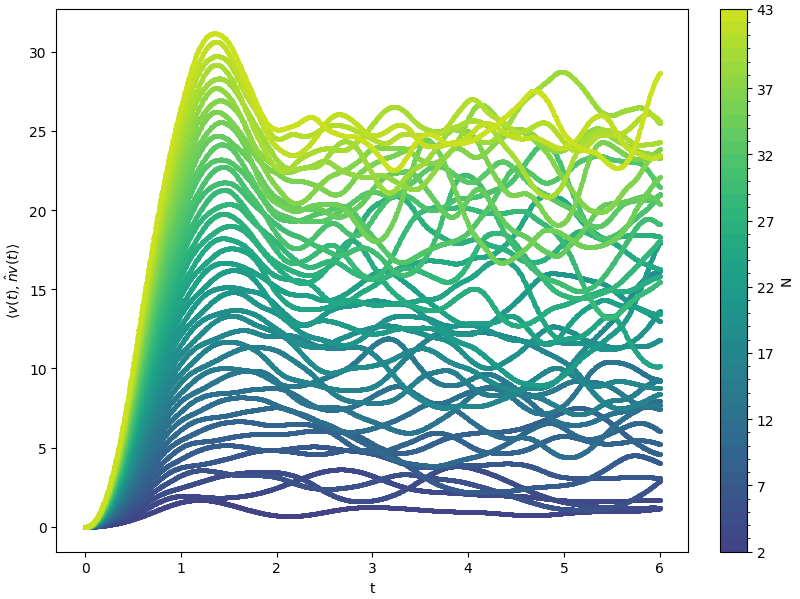

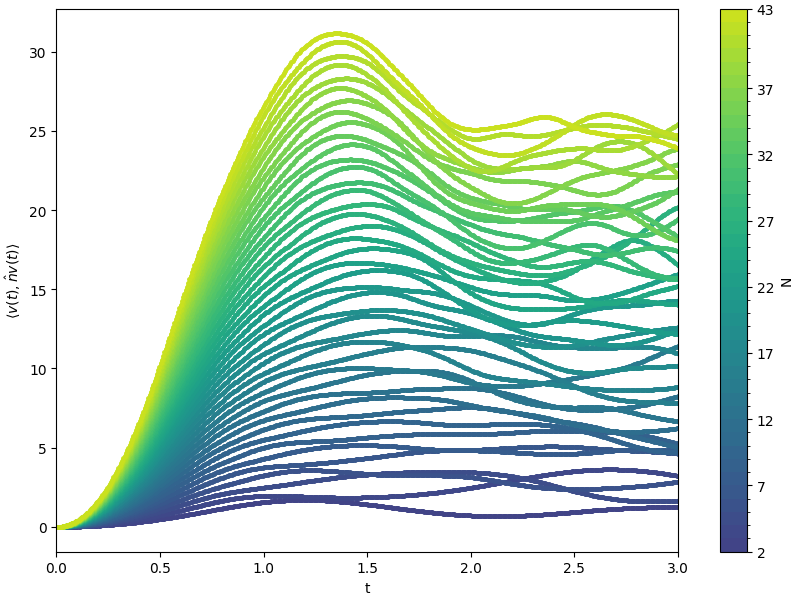

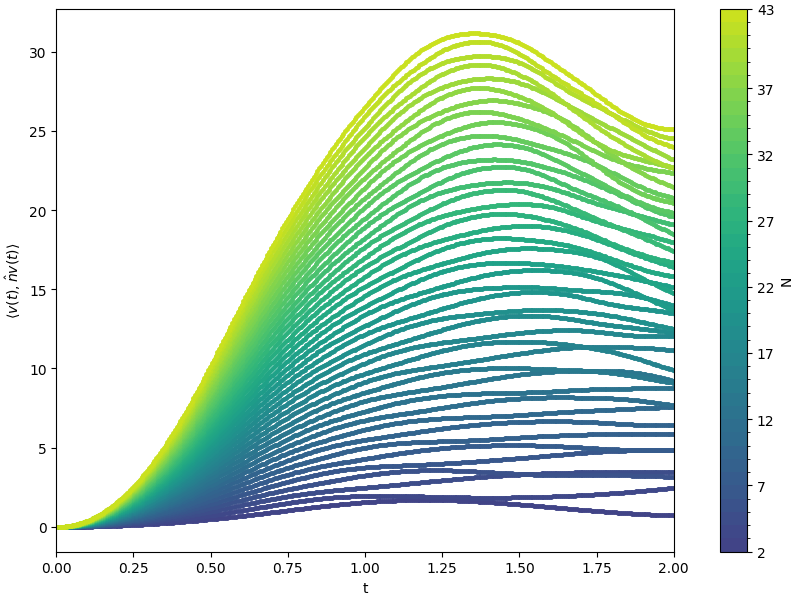

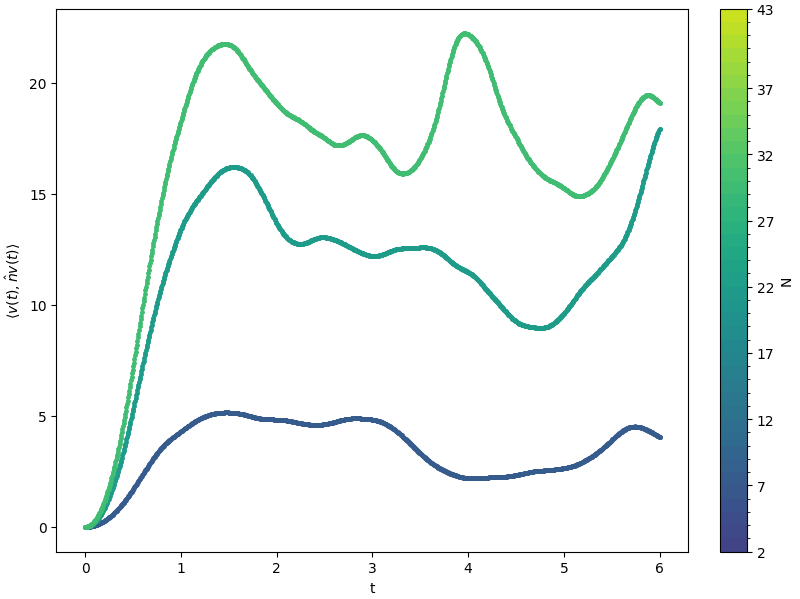

In [106]:
fig1 = plot_data(data, max_N=43)
fig2 = plot_data(data, max_N=43, x=(0, 3))
fig3 = plot_data(data, max_N=43, x=(0, 2))
fig4 = plot_data(data, max_N=43, N_selection=[22, 30, 7])

- consider steepness of initial slope
- consider highpoint of initial slope
- consider average after initial slope
